In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import gym
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from src.viz import plot_policy


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from src.momentum_agent import MomentumAgent

In [3]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000

In [4]:
agent = MomentumAgent(env)

from src.loops import evaluate
n_episodes = 1000
rewards, max_positions = evaluate(agent, env, n_episodes)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.97it/s]


In [5]:
n_completed = sum([1 if m > 0.5 else 0 for m in max_positions])
print(f'{n_completed} success out of {n_episodes} attempts')

1000 success out of 1000 attempts


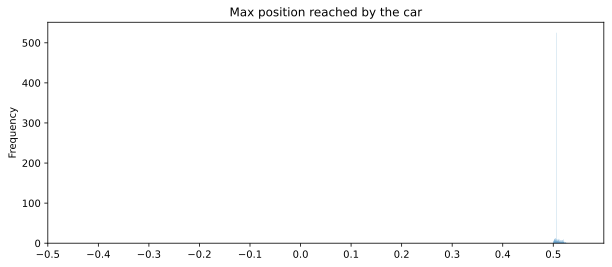

In [6]:
fig, ax = plt.subplots(figsize = (8, 3))
ax.set_title("Max position reached by the car")    
ax.set(xlim=(-0.5, 0.6), xticks=np.arange(-0.5, 0.6, 0.1))
pd.Series(max_positions).plot(kind='hist', bins=100)

plt.show()

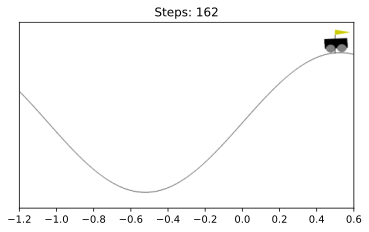

In [7]:
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


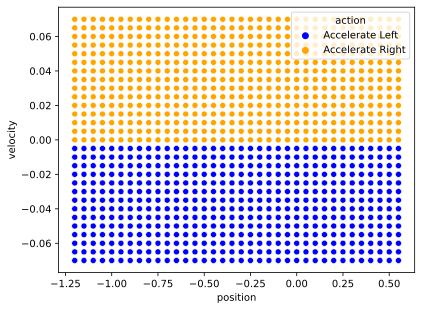

,position,velocity,action
0,-1.20,-0.070,Accelerate Left
1,-1.20,-0.065,Accelerate Left
2,-1.20,-0.060,Accelerate Left
3,-1.20,-0.055,Accelerate Left
4,-1.20,-0.050,Accelerate Left
...,...,...,...
1039,0.55,0.050,Accelerate Right
1040,0.55,0.055,Accelerate Right
1041,0.55,0.060,Accelerate Right
1042,0.55,0.065,Accelerate Right


In [8]:
positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)
plot_policy(agent, positions, velocities)